# `distinguish` real photographs from AI-generated images
## 1. `distinguish` Command Line Interface (CLI) Demonstration

In [1]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

base_dir = Path.cwd().parent


def show_images(dir, max_images=16, title=None, cols=4, figsize_per_image=(3, 3)):
    """
    Show images in a directory using a grid layout.

    Parameters:
    -----------
    dir: str or Path
        Path to the folder containing images
    max_images : int, optional
        Maximum number of images to display (default: 16)
    title : str, optional
        Title for the figure (default: name of directory)
    cols : int, optional
        Number of columns in the grid (default: 4)
    figsize_per_image : tuple, optional
        Size of each subplot (width, height) in inches (default: (3, 3))

    Returns:
    --------
    list of Path
        List of image paths that were displayed
    """
    dir = Path(dir)

    # Find all image files
    image_exts = [".jpg", ".jpeg", ".png", ".bmp"]
    image_files = []
    for ext in image_exts:
        image_files.extend(list(dir.glob(f"*{ext}")))

    # Sort by file name
    image_files = sorted(image_files)[:max_images]
    if not image_files:
        print(f"No images found in {dir}")
        return []

    # Create figure
    n_images = len(image_files)
    rows = (n_images + cols - 1) // cols
    fig, axes = plt.subplots(
        rows,
        cols,
        figsize=(figsize_per_image[0] * cols, figsize_per_image[1] * rows),
    )
    axes = axes.flatten() if n_images > 1 else [axes]

    # Display images
    for idx, img_path in enumerate(image_files):
        ax = axes[idx]
        try:
            img = Image.open(img_path).convert("RGB")
            ax.imshow(img)
            ax.set_title(img_path.name, fontsize=9, wrap=True)
        except Exception as e:
            ax.text(
                0.5,
                0.5,
                f"Error loading\n{img_path.name}",
                ha="center",
                va="center",
                transform=ax.transAxes,
                fontsize=8,
            )
            ax.set_title(img_path.name, fontsize=9, color="red")
        ax.axis("off")

    # Hide unused subplots
    for idx in range(n_images, len(axes)):
        axes[idx].axis("off")

    # Set figure title
    if title is None:
        title = f"Images from: {dir.name}"
    fig.suptitle(title, fontsize=14, weight="bold", y=0.995)

    plt.tight_layout()
    plt.show()
    print(f"Displayed {n_images} images from {dir}")
    return image_files

### Show target images

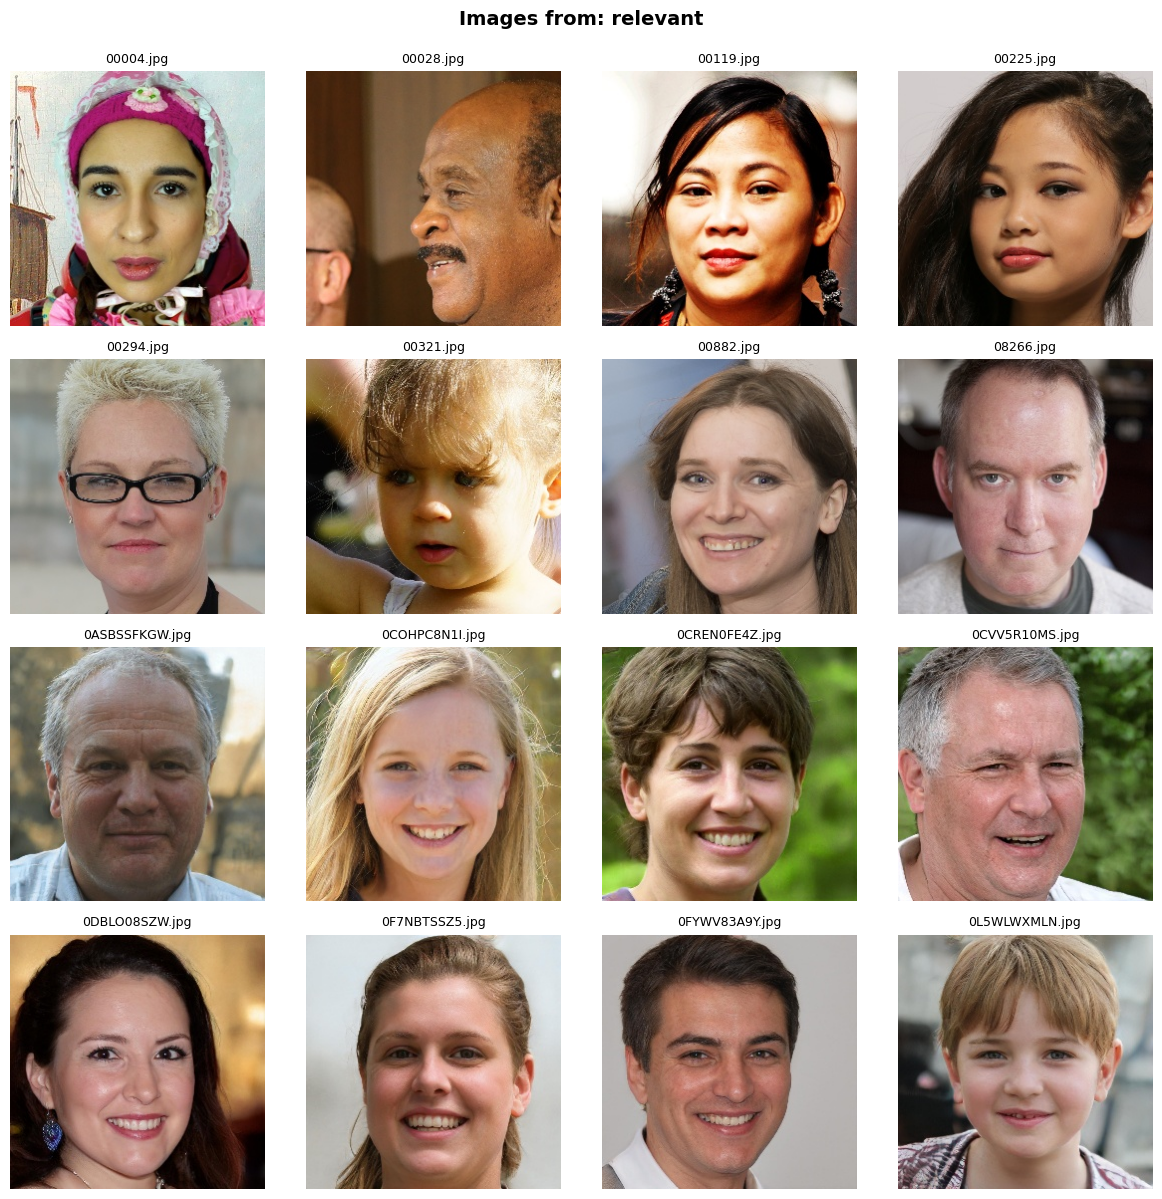

Displayed 16 images from h:\projects\distinguish\demo\relevant


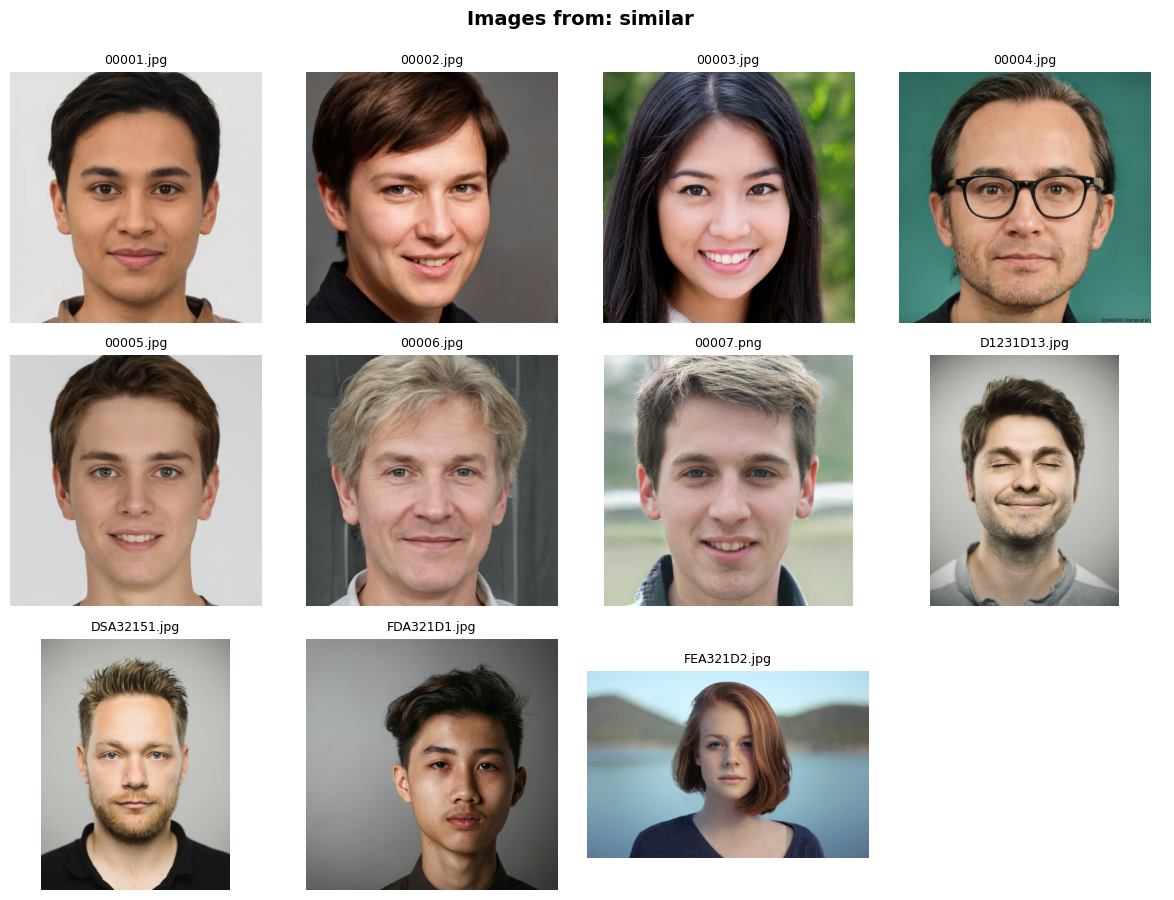

Displayed 11 images from h:\projects\distinguish\demo\similar


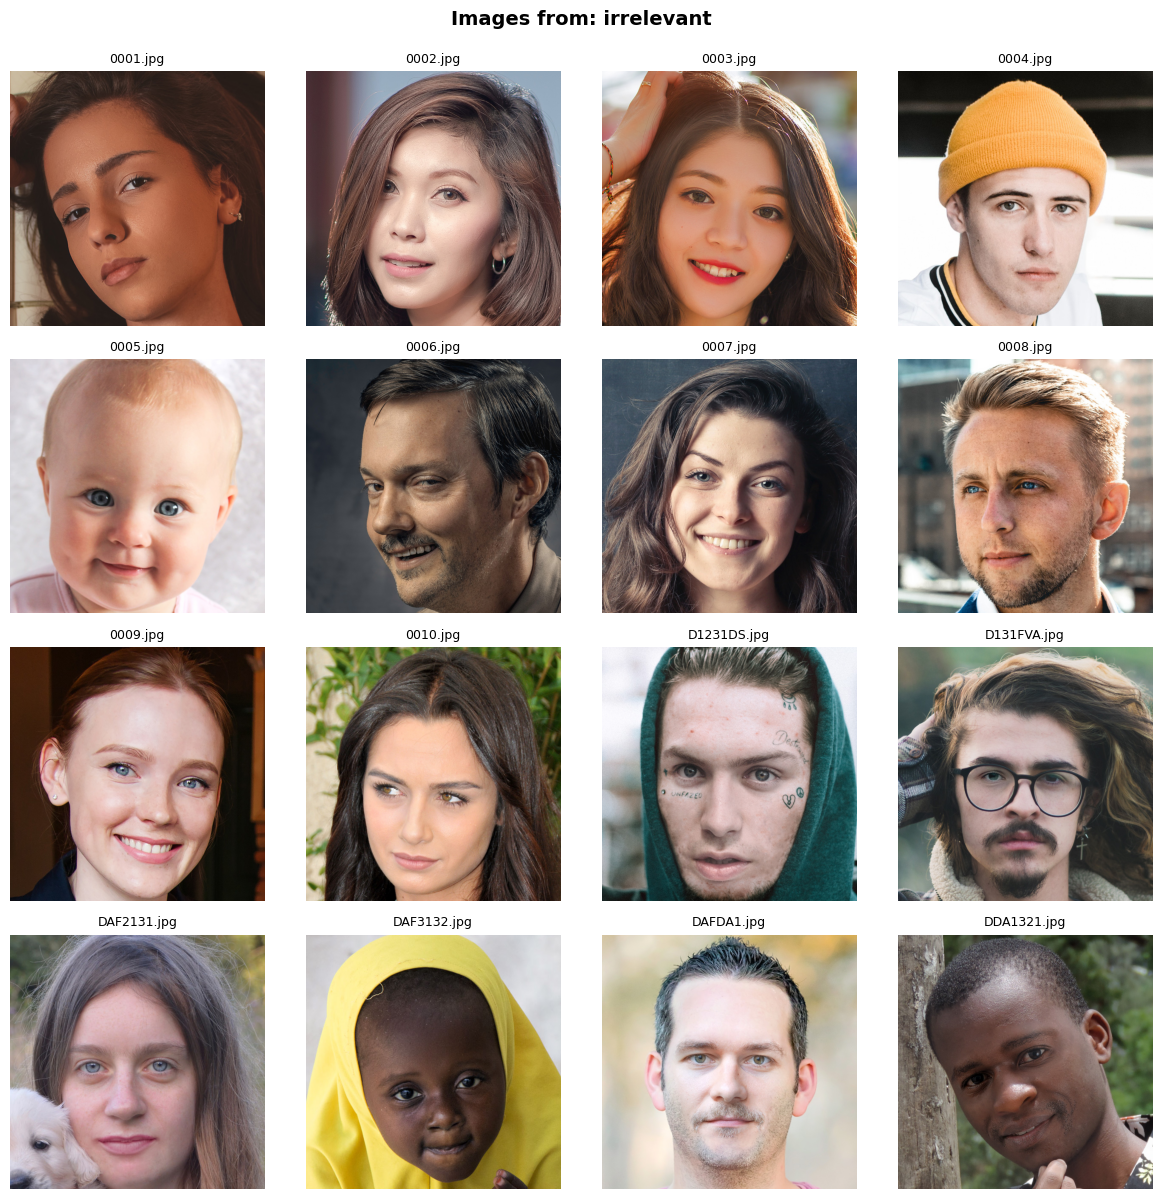

Displayed 16 images from h:\projects\distinguish\demo\irrelevant


'h:\\projects\\distinguish\\demo'

In [2]:
show_images(base_dir / "demo/relevant")
show_images(base_dir / "demo/similar")
show_images(base_dir / "demo/irrelevant")
%pwd

### Classify target images

In [3]:
%cd ..
!distinguish classify --backbone resnet34 --weights ./models/resnet34.pt --out ./demo/pred-relevant.json ./demo/relevant/
!distinguish classify --backbone resnet34 --weights ./models/resnet34.pt --out ./demo/pred-irrelevant.json ./demo/irrelevant/
!distinguish classify --backbone resnet34 --weights ./models/resnet34.pt --out ./demo/pred-similar.json ./demo/similar/

%pwd

h:\projects\distinguish


[INFO] Found 17 image(s) to classify
[INFO] Using CPU device
[INFO] [
  {
    "path": "H:\\projects\\distinguish\\demo\\relevant\\00004.jpg",
    "label": "real",
    "score": 0.0004834924475289881
  },
  {
    "path": "H:\\projects\\distinguish\\demo\\relevant\\00028.jpg",
    "label": "real",
    "score": 0.006101568695157766
  },
  {
    "path": "H:\\projects\\distinguish\\demo\\relevant\\00119.jpg",
    "label": "real",
    "score": 0.036405351012945175
  },
  {
    "path": "H:\\projects\\distinguish\\demo\\relevant\\00225.jpg",
    "label": "real",
    "score": 1.4122860193310771e-05
  },
  {
    "path": "H:\\projects\\distinguish\\demo\\relevant\\00294.jpg",
    "label": "real",
    "score": 0.04792970046401024
  },
  {
    "path": "H:\\projects\\distinguish\\demo\\relevant\\00321.jpg",
    "label": "real",
    "score": 1.5811199773452245e-05
  },
  {
    "path": "H:\\projects\\distinguish\\demo\\relevant\\00882.jpg",
    "label": "real",
    "score": 1.3457066643240978e-06
  },


'h:\\projects\\distinguish'

## 2. `distinguish` Python Application Programming Interface (API) Demonstration

### Load Classifier

In [4]:
from distinguish import Classifier


# Initialize classifier
classifier = Classifier(base_dir / "models/resnet34.pt", backbone="resnet34")
print(f"Classifier loaded successfully")
print(f"Using device: {classifier.device}")

# Classify images in relevant directory
data_dir = base_dir / "demo/relevant"
files_jpg = [path.as_posix() for path in data_dir.glob(f"*.jpg")]
predictions = classifier.predict(files_jpg)

# Show predictions
predictions

Classifier loaded successfully
Using device: cpu


[{'path': 'h:/projects/distinguish/demo/relevant/00004.jpg',
  'label': 'real',
  'score': 0.0004834924475289881},
 {'path': 'h:/projects/distinguish/demo/relevant/00028.jpg',
  'label': 'real',
  'score': 0.006101568695157766},
 {'path': 'h:/projects/distinguish/demo/relevant/00119.jpg',
  'label': 'real',
  'score': 0.036405351012945175},
 {'path': 'h:/projects/distinguish/demo/relevant/00225.jpg',
  'label': 'real',
  'score': 1.4122860193310771e-05},
 {'path': 'h:/projects/distinguish/demo/relevant/00294.jpg',
  'label': 'real',
  'score': 0.04792970046401024},
 {'path': 'h:/projects/distinguish/demo/relevant/00321.jpg',
  'label': 'real',
  'score': 1.5811199773452245e-05},
 {'path': 'h:/projects/distinguish/demo/relevant/00882.jpg',
  'label': 'real',
  'score': 1.3457066643240978e-06},
 {'path': 'h:/projects/distinguish/demo/relevant/08266.jpg',
  'label': 'real',
  'score': 1.496858567406889e-05},
 {'path': 'h:/projects/distinguish/demo/relevant/0ASBSSFKGW.jpg',
  'label': 'ai_